In [1]:
%load_ext autoreload
%autoreload 2

In [134]:
import logging
from src.risks.data.fetch.sentinel2 import Sentinel2
from IPython.display import Image

# Configure logging to display in Jupyter
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    force=True,  # This ensures the configuration is applied even if logging was previously configured
)
logger = logging.getLogger(__name__)


sentinel2 = Sentinel2()

polygon = {
    "type": "Feature",
    "properties": {},
    "geometry": {
        "coordinates": [
            [
                [10.235198982658801, 51.42076009745068],
                [10.236477278753114, 51.41697045550828],
                [10.244461712820623, 51.41823370440062],
                [10.242888425319222, 51.4220355049745],
                [10.235198982658801, 51.42076009745068],
            ]
        ],
        "type": "Polygon",
    },
}
start_date="2024-01-01",
end_date="2024-12-31",

# ndvi = sentinel2.load_ndvi_images(start_date="2024-11-01", end_date="2024-12-31", polygon=polygon)
ndvi = sentinel2.load_ndvi_images(
    start_date=start_date,
    end_date=end_date,
    polygon=polygon,
    cropped_image_cloud_cover_threshold=80,
    entire_image_cloud_cover_threshold=20,
)


2024-12-13 14:24:05,937 - src.risks.data.fetch.sentinel2 - INFO - Loading NDVI data
2024-12-13 14:24:05,938 - src.risks.data.fetch.sentinel2 - INFO - Loading Sentinel-2 data for bands ['B08', 'B04'] at 10m resolution
2024-12-13 14:24:05,938 - src.risks.data.fetch.sentinel2 - INFO - Searching for Sentinel-2 items between 2024-01-01 and 2024-12-31
2024-12-13 14:24:06,194 - src.risks.data.fetch.sentinel2 - INFO - Found 39 items
2024-12-13 14:24:06,194 - src.risks.data.fetch.sentinel2 - INFO - Signing items for access
2024-12-13 14:24:06,225 - src.risks.data.fetch.sentinel2 - INFO - Loading data into xarray Dataset


  0%|          | 0/78 [00:00<?, ?it/s]

2024-12-13 14:24:09,215 - src.risks.data.fetch.sentinel2 - INFO - Dataset time steps before filtering: 26
2024-12-13 14:24:09,216 - src.risks.data.fetch.sentinel2 - INFO - Filtered dataset to 21 time steps based on 80% cloud cover threshold
2024-12-13 14:24:09,221 - src.risks.data.fetch.sentinel2 - INFO - Successfully loaded Sentinel-2 data
2024-12-13 14:24:09,222 - src.risks.data.fetch.sentinel2 - INFO - Successfully calculated NDVI


In [136]:
ndvi_images = sentinel2.plot_ndvi_images(ndvi, polygon, polygon_crs="EPSG:4326")
mean_ndvi_values = sentinel2.calculate_mean_ndvi(ndvi, polygon, polygon_crs="EPSG:4326")

2024-12-13 14:24:18,065 - src.risks.data.fetch.sentinel2 - INFO - Calculating mean NDVI values for polygon
2024-12-13 14:24:18,070 - src.risks.data.fetch.sentinel2 - INFO - Calculated mean NDVI for 21 timestamps


In [145]:
import pandas as pd

df = pd.DataFrame.from_dict(mean_ndvi_values, orient='index', columns=['mean_ndvi'])
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = df.reindex(date_range).interpolate(method='linear')
df

,mean_ndvi
2024-01-09,0.433542
2024-01-10,0.413607
2024-01-11,0.393672
2024-01-12,0.394829
2024-01-13,0.395987
...,...
2024-11-27,0.649117
2024-11-28,0.648802
2024-11-29,0.648486
2024-11-30,0.648170


In [137]:
import pandas as pd

# Create DataFrame from dictionary

# Convert index to datetime

# Create complete date range from min to max date

# Reindex with the complete date range and interpolate missing values

# Convert index back to original string format 
df.index = df.index.strftime('%Y-%m-%d_%H-%M-%S')

df

ValueError: time data "2024-01-09" doesn't match format "%Y-%m-%d_%H-%M-%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

<Axes: >

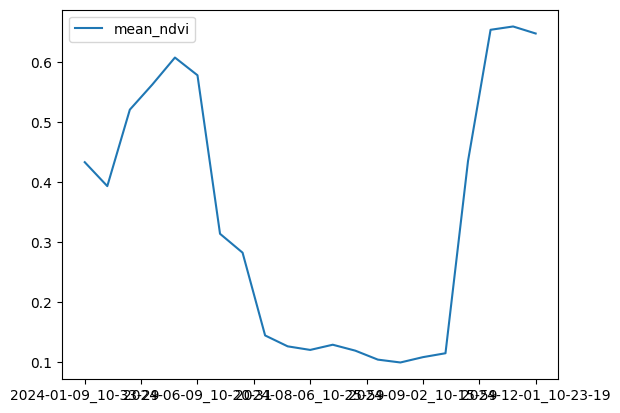

In [118]:
pd.DataFrame.from_dict(mean_ndvi_values, orient='index', columns=['mean_ndvi']).plot()

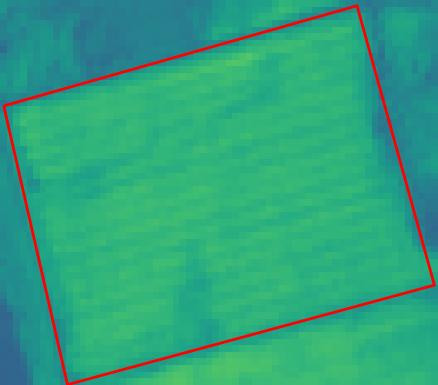

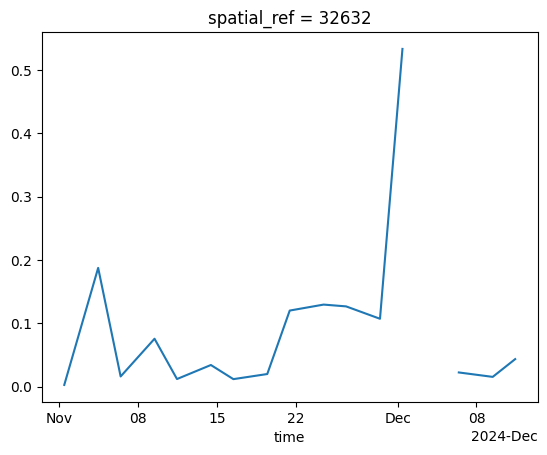

In [9]:
ndvi.plot()

In [5]:
ndvi

<xarray.DataArray (time: 1, y: 20982, x: 10980)> Size: 922MB
array([[[        nan,         nan,         nan, ...,  0.07801419,
          0.0735349 ,  0.07917448],
        [        nan,         nan,         nan, ...,  0.08068097,
          0.07858473,  0.08726328],
        [        nan,         nan,         nan, ...,  0.08213628,
          0.07995538,  0.07982261],
        ...,
        [        nan,         nan,         nan, ...,  0.02643772,
          0.01138573, -0.00476324],
        [        nan,         nan,         nan, ...,  0.02678093,
          0.01121138, -0.01274945],
        [        nan,         nan,         nan, ...,  0.01011176,
          0.00403769, -0.00297378]]],
      shape=(1, 20982, 10980), dtype=float32)
Coordinates:
  * y            (y) float64 168kB 5.8e+06 5.8e+06 5.8e+06 ... 5.59e+06 5.59e+06
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
    spatial_ref  int32 4B 32632
  * time         (time) datetime64[ns] 8B 2024-01-01T10:24:31.024000